In [29]:
# This code is an implementation of a deep learning model using transfer learning with VGG16 architecture for binary image classification.

# The code first defines the paths to the train, validation, and test folders. It then defines the image size and batch size for the data generator and creates data generators for the train, validation, and test sets using the ImageDataGenerator class from Keras.

# Next, the code loads the pre-trained VGG16 model, excluding the top layers, and freezes the pre-trained layers. It then adds custom top layers to the pre-trained VGG16 model using the Sequential class from Keras.

# The code then compiles the model using the binary cross-entropy loss function and the Adam optimizer with a learning rate of 0.0004. It trains the model using the fit method of the model object and the data generators for 10 epochs.

# Finally, the code evaluates the model on the test set using the evaluate method of the model object and prints the test accuracy.

# Overall, this code provides a good implementation of transfer learning with a pre-trained VGG16 model for binary image classification using Keras.

# I saw a csv file, and I guess it's a metadata file to give me some information (labelling)

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Define paths to the train, validation, and test folders
train_path = "/Users/ehz/Downloads/technical_test_venturas/dataset/train"
val_path = "/Users/ehz/Downloads/technical_test_venturas/dataset/validation"
test_path = "/Users/ehz/Downloads/technical_test_venturas/dataset/test"

# Define the image size and batch size for the data generator
img_size = (224, 224)
batch_size = 120

# Define the data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=img_size, 
                                                    batch_size=batch_size, 
                                                    class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path, 
                                                target_size=img_size, 
                                                batch_size=batch_size, 
                                                class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_path, 
                                                   target_size=img_size, 
                                                   batch_size=batch_size, 
                                                   class_mode='binary')

# Load the pre-trained VGG16 model, excluding the top layers
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers in the VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Add custom top layers to the pre-trained VGG16 model
model = tf.keras.Sequential([
    vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate to fine-tune the pre-trained layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model using the data generators
history = model.fit(train_generator, 
                    epochs=10, 
                    validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


2023-04-18 04:17:36.546728: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 460 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/10


2023-04-18 04:17:42.574248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
/Users/ehz/nikeadidas/lib/python3.11/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 [==============================] - ETA: 0s - loss: 1.7109 - accuracy: 0.5370 

2023-04-18 04:18:33.431191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 61s 16s/step - loss: 1.7109 - accuracy: 0.5370 - val_loss: 0.9399 - val_accuracy: 0.5091
Epoch 2/10
4/4 [==============================] - 93s 21s/step - loss: 0.8080 - accuracy: 0.5348 - val_loss: 0.6467 - val_accuracy: 0.7091
Epoch 3/10
4/4 [==============================] - 78s 21s/step - loss: 0.6155 - accuracy: 0.6804 - val_loss: 0.5787 - val_accuracy: 0.6545
Epoch 4/10
4/4 [==============================] - 84s 21s/step - loss: 0.5391 - accuracy: 0.7500 - val_loss: 0.5160 - val_accuracy: 0.7455
Epoch 5/10
4/4 [==============================] - 79s 20s/step - loss: 0.4698 - accuracy: 0.8217 - val_loss: 0.4790 - val_accuracy: 0.7636
Epoch 6/10
4/4 [==============================] - 78s 19s/step - loss: 0.4395 - accuracy: 0.8130 - val_loss: 0.4757 - val_accuracy: 0.7636
Epoch 7/10
4/4 [==============================] - 81s 20s/step - loss: 0.3905 - accuracy: 0.8348 - val_loss: 0.4466 - val_accuracy: 0.8000
Epoch 8/10
4/4 [======================

2023-04-18 04:37:26.498928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 6s 6s/step - loss: 0.4149 - accuracy: 0.8000
Test accuracy: 0.800000011920929


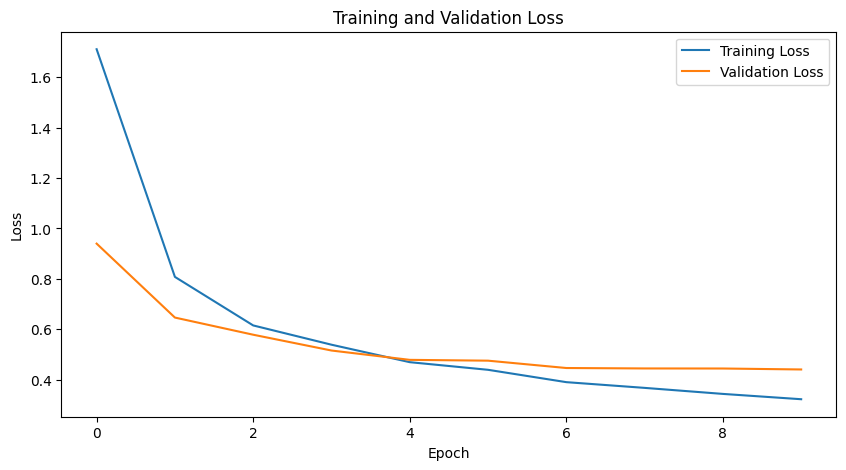

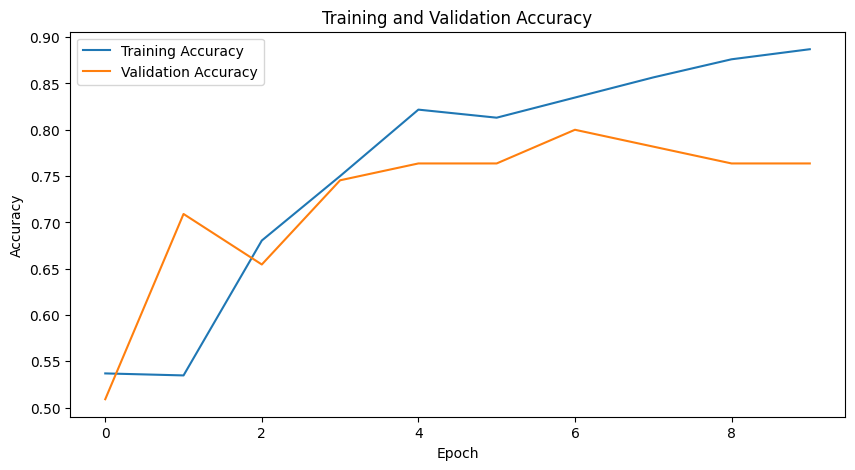

In [2]:
import matplotlib.pyplot as plt

# Get the history data
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
# Save the model to a file
model.save('my_model.h5')


In [6]:
# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.h5')


In [ ]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image
# import numpy as np

# # Load the saved model
# loaded_model = load_model('my_model.h5')

# # Load the image to classify
# img_path = 'Path to your completely unseen file for the inference'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = x / 255.0

# # Use the loaded model to make predictions
# prediction = loaded_model.predict(x)

# # Print the predicted class and probability
# if prediction[0] > 0.5:
#     print("The image is classified as 'nike'")
# else:
#     print("The image is classified as 'adidas'")

Some additional techniques that have the potential to enhance the performance of the model:

Data Augmentation: Data augmentation involves generating additional training data by applying random transformations to existing images, such as rotating, flipping, or zooming. This can help prevent overfitting and improve model performance.

Ensemble Learning: Ensemble learning involves combining the predictions of multiple models to improve performance. This can be done by training multiple models on different subsets of the data or using different architectures and combining their predictions at inference time. But it is a bit of time consuming and do need an extensive tinkering. 

Hyperparameter Tuning: Hyperparameter tuning involves finding the optimal values for the model's hyperparameters, such as learning rate, batch size, and number of epochs. This can be done using grid search, random search, or other optimization techniques to find the combination of hyperparameters that yields the best performance.

In the context of binary classification, at least for this example, in my view, combining ViT and convolutional layers can be effective even when dealing with limited data. The use of a transformer can help in capturing global features from the data, while the convolutional layers can help in capturing local features.

Additionally, the combination of both architectures can help in regularizing the model, which can be especially useful in situations where there is limited data. This can prevent the model from overfitting to the training data and improve its generalization performance.

However, it is important to note that the performance of the model will ultimately depend on the quality and quantity of the available data. If there is very limited data available, it may be difficult to achieve good performance, regardless of the architecture used. In such cases, data augmentation techniques and transfer learning from pre-trained models can be used to improve performance.

BigTransfer(BiT) is trained on public datasets, along with code in TF2, Jax and Pytorch. This will help anyone to reach state of the art performance on their task of interest, even with just a handful of labeled images per class. Also there are swift transformer. Plus, I would like to do that image classification via fine-tuning with EfficientNet, but due to time constraint, I did't. Also, finding the most optimal combination of the hyperparameters needs more tweaking and tinkering. Though, keras provides an API, "keras-tuner". Also, to make things more streamlined, new Keras API has a new pip package, name,  keras-cv that presumably toolbox of modular building blocks (layers, metrics, losses, data augmentation) that computer vision engineers can leverage to quickly assemble production-grade, state-of-the-art training and inference pipelines for common use cases such as image classification.